# Linear Discriminant Analysis (LDA)

## What is LDA

(Fishers) Linear Discriminant Analysis (LDA) searches for the projection of a dataset which maximizes the *between class scatter to within class scatter* ($\frac{S_B}{S_W}$) ratio of this projected dataset. The goal is to project/transform a dataset $A$ using a transformation matrix $w$ such that the ratio of between class scatter to within class scatter of the transformed dataset $y=w^T*A$
 is maximized. Hence our goal is to find the transformation matrix  that accomplishes this. In Fisher's terms:
*"Find the linear combination $Z=a^T*X$ such that the between class variance is maximized relative to the within class variance."*(Hastie, Tibshirani and Friedman, 2008, p.114). Therewith, LDA is like PCA which we have introduced in the last chapter with the difference, that LDA aims to find the projection of maximum separability. But slowly. Consider the following illustration which shows a dataset consisting of three different classes. We now want to have the within and between class scatter of this dataset.

![LDA](./images/LDA.png)

## Maths behind LDA

As we can see in the illustration, we want to have a measure of the within and between class scatters. Therefore, we use the following two formulas for the between class scatter $S_B$ and the within class scatter $S_w$. Let's derive the meaning of them.

### 1. Scatter Within ($S_w$)
$$
S_w= \sum_{classes~c}\sum_{j\in c}(x_j-\mu_c)(x_j-\mu_c)^T
$$
where
- $classes~c$ are different classes 
- $x_j$ is the value vector per instance per class
- $\mu_c$ represents the mean-vector of class $c$ and is a vector which contains the values of each dimension for each class

Mind that we calculated the scatter matrices and not the covariance matrices since then we must divide by n respectively n-1 but we didn't do that here. Nevertheless, the dimensionality of the scatter matrix is the same as for the covariance matrix. When a class has 2 dimensions, the scatter matrix is of shape (2x2) and consists of the elements:
$$
\begin{bmatrix}
scatter_{xx} & scatter_{xy} \\
scatter_{yx} & scatter_{yy}
\end{bmatrix}
$$
As said, we calculate the scatter per class and then sum up all the per_class scatter matrices to receive a measure for the scatter within ($S_w$)

Let's derive this with Python code:

[[ 1.07646534 -0.05208045]
 [-0.05208045  0.45007299]]


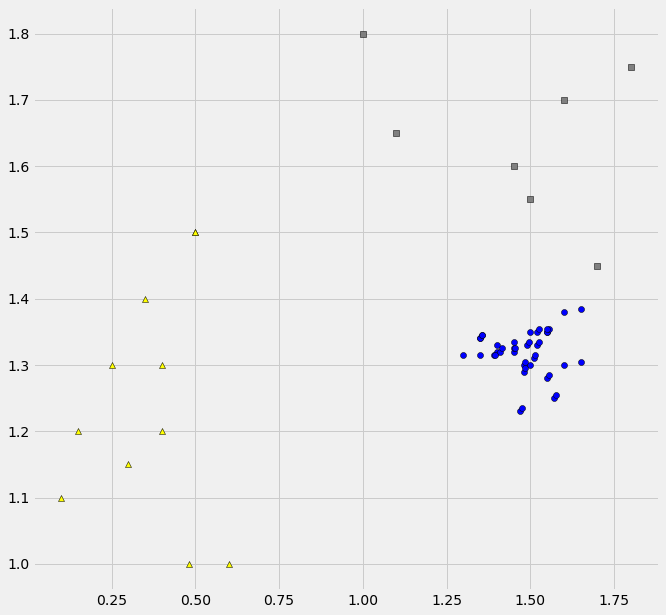

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
np.random.seed(seed=42)

# Create data
rectangles = np.array([[1,1.5,1.7,1.45,1.1,1.6,1.8],[1.8,1.55,1.45,1.6,1.65,1.7,1.75]])
triangles = np.array([[0.1,0.5,0.25,0.4,0.3,0.6,0.35,0.15,0.4,0.5,0.48],[1.1,1.5,1.3,1.2,1.15,1.0,1.4,1.2,1.3,1.5,1.0]])
circles = np.array([[1.5,1.55,1.52,1.4,1.3,1.6,1.35,1.45,1.4,1.5,1.48,1.51,1.52,1.49,1.41,1.39,1.6,1.35,1.55,1.47,1.57,1.48,
                    1.55,1.555,1.525,1.45,1.35,1.65,1.355,1.455,1.45,1.55,1.485,1.515,1.525,1.495,1.415,1.395,1.65,1.355,1.555,1.475,1.575,1.485]
                    ,[1.3,1.35,1.33,1.32,1.315,1.30,1.34,1.32,1.33,1.35,1.30,1.31,1.35,1.33,1.32,1.315,1.38,1.34,1.28,1.23,1.25,1.29,
                     1.35,1.355,1.335,1.325,1.3155,1.305,1.345,1.325,1.335,1.355,1.305,1.315,1.355,1.335,1.325,1.3155,1.385,1.345,1.285,1.235,1.255,1.295]])

#Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax0.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')
ax0.scatter(circles[0],circles[1],marker='o',c='blue',edgecolor='black')




# Calculate the mean vectors per class
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(triangles,axis=1).reshape(2,1)
mean_circles = np.mean(circles,axis=1).reshape(2,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up

scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)


# Mind that we do not calculate the covariance matrix here because then we have to divide by n or n-1 as shown below
#print((1/7)*np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T))
#print(np.var(rectangles[0],ddof=0))

scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
scatter_circles = np.dot((circles-mean_circles),(circles-mean_circles).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_triangles+scatter_circles+scatter_rectangles
print(SW)


plt.show()

## Scatter Between ($S_B$)

$$
S_B= \sum_{classes~c}N_c(\mu_c-\mu)(\mu_c-\mu)^T
$$

With this second formula figuratively speaking, we measure the scatter of the total dataset, that is the scatter between the classes and therewith how "far away" the single class-clusters are. Here $classes~c$ are the different classes of our dataset (rectangles, triangles, circles). $\mu_c$ is the mean per class. $\mu$ is the mean of the total dataset and contains one value per dimension with the difference that we now consider all datapoints in the dataset and not only the datapoints belonging to one class $c$. The derivation of the $S_B$ is not that obvious and the details can be find [here](https://www.python-course.eu/linear_discriminant_analysis.php).

We can summariz the process of obtaining $w$ which is used to transform our original dataset, in six steps:

1. Standardize the dataset (zero mean, standard deviation of 1)
2. Compute the total mean vector $\mu$ as well as the mean vectors per class $\mu_c$ 
3. Compute the scatter withing and scatter between matrices $S_B$ and $S_W$ 
4. Compute the eigenvalues and eigenvectors of $S_W^{-1}S_B$ to find the $w$ which maximizes $\frac{w^TS_Bw}{w^TS_Ww}$ 
5. Select the Eigenvectors of the corresponding $k$ largest Eigenvalues to create a $d\times k$ dimensional transformation matrix $w$ where the Eigenvectors are the columns of this matrix
6. Use $w$ to transform the original $n\times d$ dimensional dataset $x$ into a lower, $n\times k$ dimensional dataset $y$

## LDA with sklearn

The Linear Discriminant Analysis is available in the scikit-learn Python machine learning library via the [LinearDiscriminantAnalysis class](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).

The method can be used directly without configuration, although the implementation does offer arguments for customization, such as the choice of solver and the use of a penalty.

```python
...
# create the lda model
model = LinearDiscriminantAnalysis()
```

We can demonstrate the Linear Discriminant Analysis method with a worked example.

First, let’s define a synthetic classification dataset.

We will use the [`make_classification()` function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to create a dataset with 1,000 examples, each with 10 input variables.

The example creates and summarizes the dataset.

In [4]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(1000, 10) (1000,)


Running the example creates the dataset and confirms the number of rows and columns of the dataset.

We can fit and evaluate a Linear Discriminant Analysis model using [repeated stratified k-fold cross-validation](https://machinelearningmastery.com/k-fold-cross-validation/) via the [RepeatedStratifiedKFold class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html). We will use 10 folds and three repeats in the test harness.

The complete example of evaluating the Linear Discriminant Analysis model for the synthetic binary classification task is listed below.

In [5]:
# evaluate a lda model on the dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.893 (0.033)


Running the example evaluates the Linear Discriminant Analysis algorithm on the synthetic dataset and reports the average accuracy across the three repeats of 10-fold cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Consider running the example a few times.

In this case, we can see that the model achieved a mean accuracy of about 89.3 percent.

We may decide to use the Linear Discriminant Analysis as our final model and make predictions on new data.

This can be achieved by fitting the model on all available data and calling the `predict()` function passing in a new row of data.

We can demonstrate this with a complete example listed below.

In [6]:
# make a prediction with a lda model on the dataset
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# fit model
model.fit(X, y)
# define new data
row = [0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted Class: %d' % yhat)

Predicted Class: 1


Running the example fits the model and makes a class label prediction for a new row of data.

Next, we can look at configuring the model hyperparameters.

## Tune LDA Hyperparameters

The hyperparameters for the Linear Discriminant Analysis method must be configured for your specific dataset.

An important hyperparameter is the solver, which defaults to ‘svd‘ but can also be set to other values for solvers that support the shrinkage capability.

The example below demonstrates this using the [GridSearchCV class](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with a grid of different solver values.

In [7]:
# grid search solver for lda
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.893
Config: {'solver': 'svd'}


Running the example will evaluate each combination of configurations using repeated cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Try running the example a few times.

In this case, we can see that the default SVD solver performs the best compared to the other built-in solvers.

Next, we can explore whether using shrinkage with the model improves performance.

Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model.

> Regularization reduces the variance associated with the sample based estimate at the expense of potentially increased bias. This bias variance trade-off is generally regulated by one or more (degree-of-belief) parameters that control the strength of the biasing towards the “plausible” set of (population) parameter values.

This can be set via the “shrinkage” argument and can be set to a value between 0 and 1. We will test values on a grid with a spacing of 0.01.

In order to use the penalty, a solver must be chosen that supports this capability, such as ‘eigen’ or ‘lsqr‘. We will use the latter in this case.

The complete example of tuning the shrinkage hyperparameter is listed below.

In [8]:
# grid search shrinkage for lda
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.894
Config: {'shrinkage': 0.02}


Running the example will evaluate each combination of configurations using repeated cross-validation.

Your specific results may vary given the stochastic nature of the learning algorithm. Try running the example a few times.

In this case, we can see that using shrinkage offers a slight lift in performance from about 89.3 percent to about 89.4 percent, with a value of 0.02.